## Basic Preprocessing

In [1]:
using CSV, DataFrames, Plots, Random, DecisionTree, Statistics, LinearAlgebra, JuMP, Gurobi

In [2]:
using ScikitLearn, DecisionTree, MLDataUtils, CSV, DataFrames,Plots, CategoricalArrays
using StatsBase, Random, LinearAlgebra, Plots, DecisionTree, DataFrames, MLDataUtils, ScikitLearn

In [3]:
## Reading the data
using CSV, DataFrames
df = CSV.read("bank_processed.csv", DataFrame)
select!(df, Not(:Column1))

36192×58 DataFrame
   Row │ age    duration  campaign  pdays  previous  emp.var.rate  cons.price. ⋯
       │ Int64  Float64   Int64     Int64  Int64     Float64       Float64     ⋯
───────┼────────────────────────────────────────────────────────────────────────
     1 │    56  4.35             1      0         0           1.1          93. ⋯
     2 │    57  2.48333          1      0         0           1.1          93.
     3 │    37  3.76667          1      0         0           1.1          93.
     4 │    40  2.51667          1      0         0           1.1          93.
     5 │    56  5.11667          1      0         0           1.1          93. ⋯
     6 │    45  3.3              1      0         0           1.1          93.
     7 │    59  2.31667          1      0         0           1.1          93.
     8 │    41  3.61667          1      0         0           1.1          93.
     9 │    24  6.33333          1      0         0           1.1          93. ⋯
    10 │    25  0.833333         1      0         0           1.1          93.
    11 │    41  0.916667         1      0         0           1.1          93.
   ⋮   │   ⋮       ⋮         ⋮        ⋮       ⋮           ⋮              ⋮     ⋱
 36183 │    62  8.05             2      6         3          -1.1          94.
 36184 │    64  2.51667          3      0         0          -1.1          94. ⋯
 36185 │    36  4.23333          2      0         0          -1.1          94.
 36186 │    37  4.68333          1      0         0          -1.1          94.
 36187 │    29  1.86667          1      9         1          -1.1          94.
 36188 │    73  5.56667          1      0         0          -1.1          94. ⋯
 36189 │    46  6.38333          1      0         0          -1.1          94.
 36190 │    56  3.15             2      0         0          -1.1          94.
 36191 │    44  7.36667          1      0         0          -1.1          94.
 36192 │    74  3.98333          3      0         1          -1.1          94. ⋯
                                               52 columns and 36171 rows omitted

In [4]:
names(df)

58-element Vector{String}:
 "age"
 "duration"
 "campaign"
 "pdays"
 "previous"
 "emp.var.rate"
 "cons.price.idx"
 "cons.conf.idx"
 "euribor3m"
 "nr.employed"
 "FinalOutcome"
 "contact_telephone"
 "job_blue-collar"
 ⋮
 "month_jun"
 "month_mar"
 "month_may"
 "month_nov"
 "month_oct"
 "month_sep"
 "day_of_week_mon_1"
 "day_of_week_thu_1"
 "day_of_week_tue_1"
 "day_of_week_wed_1"
 "poutcome_nonexistent"
 "poutcome_success"

In [5]:
## Remove variables that are irrelevant to segmenting customers
select!(df, Not([:"emp.var.rate", :"cons.price.idx", :"cons.conf.idx", :"euribor3m", :"nr.employed"]))
select!(df, Not(:FinalOutcome))

36192×53 DataFrame
   Row │ age    duration  campaign  pdays  previous  FinalOutcome  contact_tel ⋯
       │ Int64  Float64   Int64     Int64  Int64     Int64         Int64       ⋯
───────┼────────────────────────────────────────────────────────────────────────
     1 │    56  4.35             1      0         0             0              ⋯
     2 │    57  2.48333          1      0         0             0
     3 │    37  3.76667          1      0         0             0
     4 │    40  2.51667          1      0         0             0
     5 │    56  5.11667          1      0         0             0              ⋯
     6 │    45  3.3              1      0         0             0
     7 │    59  2.31667          1      0         0             0
     8 │    41  3.61667          1      0         0             0
     9 │    24  6.33333          1      0         0             0              ⋯
    10 │    25  0.833333         1      0         0             0
    11 │    41  0.916667         1      0         0             0
   ⋮   │   ⋮       ⋮         ⋮        ⋮       ⋮           ⋮                ⋮   ⋱
 36183 │    62  8.05             2      6         3             1
 36184 │    64  2.51667          3      0         0             0              ⋯
 36185 │    36  4.23333          2      0         0             0
 36186 │    37  4.68333          1      0         0             1
 36187 │    29  1.86667          1      9         1             0
 36188 │    73  5.56667          1      0         0             1              ⋯
 36189 │    46  6.38333          1      0         0             0
 36190 │    56  3.15             2      0         0             0
 36191 │    44  7.36667          1      0         0             1
 36192 │    74  3.98333          3      0         1             0              ⋯
                                               47 columns and 36171 rows omitted

In [8]:
## Standardizing our Data in order to perform K-Means clustering

using Statistics
X = Matrix(df)

X_norm = (X .- mean(X, dims=1)) ./ std(X, dims=1, corrected = false)

36192×52 Matrix{Float64}:
  1.52595      -0.0155596  -0.855003  …  -0.499076   0.412922  -0.194252
  1.62133      -0.446323   -0.855003     -0.499076   0.412922  -0.194252
 -0.286263     -0.150173   -0.855003     -0.499076   0.412922  -0.194252
 -0.000123863  -0.43863    -0.855003     -0.499076   0.412922  -0.194252
  1.52595       0.161361   -0.855003     -0.499076   0.412922  -0.194252
  0.476774     -0.257864   -0.855003  …  -0.499076   0.412922  -0.194252
  1.81209      -0.484784   -0.855003     -0.499076   0.412922  -0.194252
  0.0952557    -0.184788   -0.855003     -0.499076   0.412922  -0.194252
 -1.5262        0.442126   -0.855003     -0.499076   0.412922  -0.194252
 -1.43082      -0.827086   -0.855003     -0.499076   0.412922  -0.194252
  0.0952557    -0.807856   -0.855003  …  -0.499076   0.412922  -0.194252
 -1.43082      -0.165557   -0.855003     -0.499076   0.412922  -0.194252
 -1.0493       -0.492476   -0.855003     -0.499076   0.412922  -0.194252
  ⋮                      

## K-Means Clustering

In [9]:
using ParallelKMeans
dissimilarity = [ParallelKMeans.kmeans(X_norm', i; tol=1e-6, max_iters=2000, verbose=false).totalcost for i = 2:100]

99-element Vector{Float64}:
      1.8398815441120372e6
      1.7239661317917574e6
      1.6853765415219623e6
      1.653795900079688e6
      1.6112263281995612e6
      1.4687698612479672e6
      1.4571560431577708e6
      1.472960586639648e6
      1.4477418667081308e6
      1.448831365749332e6
      1.3949854840101744e6
      1.3551351123124575e6
      1.3568262677447372e6
      ⋮
 737281.5028127502
 735058.5360488024
 738424.872426914
 731575.3340289012
 737231.8055347566
 733402.8275106979
 718164.2540223043
 720248.9965768132
 718242.2560322875
 722230.348990598
 722036.9449875563
 709733.8134963725

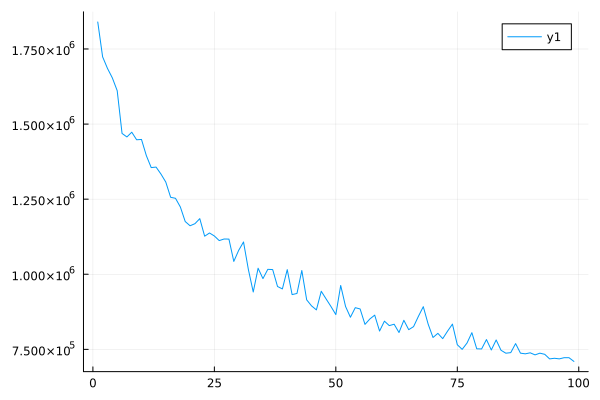

In [10]:
## Plotting of Dissimilarity (Elbow Method) for different number of clusters
using Plots
plot(dissimilarity)

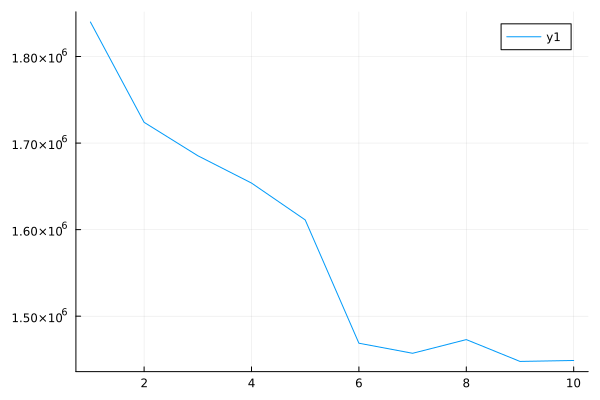

In [11]:
## Similar approach for a smaller number of clusters. We notice that at k = 6 the dissimilarity stabilizes
plot(dissimilarity[1:10])

In [12]:
## Application of K-Means Clustering with k = 6

using StableRNGs, ParallelKMeans

rng = StableRNG(1)
k = 6
clustering_result = kmeans(X_norm', k; rng=rng)
y = clustering_result.assignments

36192-element Vector{Int64}:
 6
 6
 6
 6
 6
 6
 6
 6
 4
 4
 6
 4
 4
 ⋮
 4
 6
 3
 6
 6
 6
 3
 6
 6
 6
 6
 6

In [13]:
## Number of Assignments to each cluster
counts(y)

6-element Vector{Int64}:
   667
  9627
  1301
  9259
   877
 14461

In [14]:
## Plotting of call duration vs age for each cluster
features = collect(X)'; 
  
  
# plot with the point color mapped
# to the assigned cluster index
scatter(df.age, df.duration,
        marker_z = y,
        color =:blue, legend = true)

## Application of Optimal Classification Trees by IAI

Due to the fact that an IAI license is required for these particular code cells to be reproduced, an image of the final classification tree will be provided

In [ ]:
grid = IAI.GridSearch(
    IAI.OptimalTreeClassifier(random_seed=1, criterion = "gini"),
    minbucket=[100],
    max_depth=2:4,
)
IAI.fit!(grid, df, y)

In [ ]:
IAI.get_learner(grid)

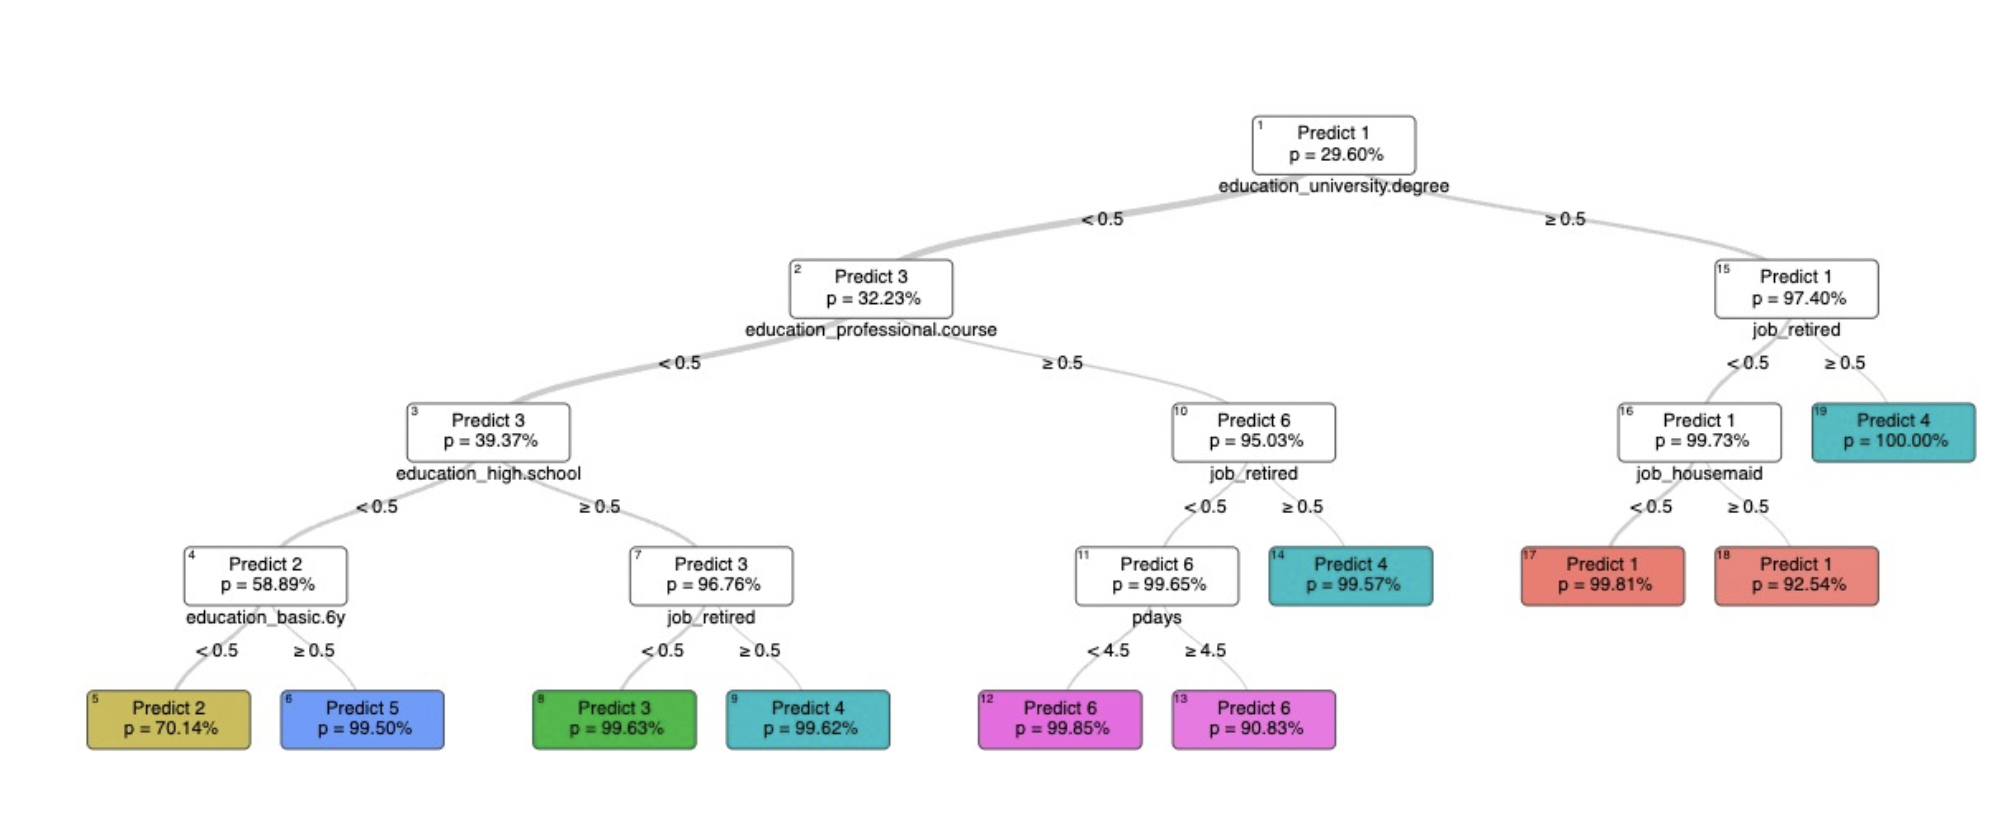

In [ ]:
IAI.score(grid, df, y, criterion=:misclassification)

0.91

In [ ]:
IAI.get_best_params(grid)

The clustering approach can give us an overview of our customer database, separating our customers in different segments. The bank (or each organization applying similar techniques) can utilize these findings to identify the different types of customers on their customer database and pursue different marketing and sales initiatives in order to increase their conversion rates.

In our case, we could characterize the identified clusters as:

1) Individuals with university degrees who are currently active in their jobs

2) Individuals without any level of education

3) Individuals with high school education who are active in their jobs

4) Retired individuals with university degree or high school education

5) Individuals with only a basic 6 years education

6) Individuals who are currently working without a university degree but with a professional course


Banks can unlock strategic advantages by designing tailored products per market segment. For example, cluster 6 identifies freelances as a particular target group.